<a href="https://colab.research.google.com/github/Douglas1997Ortiz/Score-Bancario/blob/main/PROYECTO2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINK DE PRESENTACIÓN 
# * https://docs.google.com/presentation/d/1s93bLwqpeHhmmIAdOQesCtW6hDfY1bII/edit?usp=sharing&ouid=110079623623754342229&rtpof=true&sd=true

# LINK VIDEO
# * https://udlaec-my.sharepoint.com/personal/douglas_ortiz_udla_edu_ec/Documents/Recordings/Reuni%C3%B3n%20con%20(Estudiante)%20Douglas%20Lenin%20Ortiz%20Tejada-20230430_215450-Grabaci%C3%B3n%20de%20la%20reuni%C3%B3n.mp4?web=1

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PROPUESTA 2
# SCORE BANKING

In [4]:
df1_test= pd.read_csv('/content/drive/MyDrive/Coding Dojo/PROYECTO 2/TEST SCORE BANKING.csv')
dtype_dict = {'Monthly_Balance': str}
df1_train= pd.read_csv('/content/drive/MyDrive/Coding Dojo/PROYECTO 2/TRAIN SOCRE BANKING.csv' , dtype=dtype_dict)


In [5]:
print(df1_train.columns[26])

Monthly_Balance


In [6]:
df1_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
# Hacer una base paralela para imputarla con esta los valores faltantes (CustomerId)

In [8]:
df1=pd.concat([df1_test, df1_train], axis=0)
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,NaN
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,NaN
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,NaN
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,NaN
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,NaN


In [9]:
df1.shape

(150000, 28)

In [10]:
df1.apply(lambda x: x.unique())

ID                          [0x160a, 0x160b, 0x160c, 0x160d, 0x1616, 0x161...
Customer_ID                 [CUS_0xd40, CUS_0x21b1, CUS_0x2dbc, CUS_0xb891...
Month                       [September, October, November, December, Janua...
Name                        [Aaron Maashoh, Rick Rothackerj, Langep, nan, ...
Age                         [23, 24, 24_, 28, 35, 55, 22, 31, 32, 1694, 34...
SSN                         [821-00-0265, 004-07-5839, #F%$D@*&8, 486-85-3...
Occupation                  [Scientist, _______, Teacher, Engineer, Entrep...
Annual_Income               [19114.12, 34847.84, 143162.64, 30689.89, 4148...
Monthly_Inhand_Salary       [1824.8433333333328, nan, 3037.986666666666, 1...
Num_Bank_Accounts           [3, 2, 1, 7, 4, 0, 8, 5, 6, 163, 936, 9, 10, 7...
Num_Credit_Card             [4, 5, 1, 7, 6, 8, 3, 211, 182, 9, 2, 10, 914,...
Interest_Rate               [3, 6, 8, 4, 5, 15, 7, 12, 20, 1, 5163, 1766, ...
Num_of_Loan                 [4, 1, 3, 1381, -100, 0, 2, 7, 5, 6,

In [11]:
# Se corrigenn los valores atipicos y signos que no perteencen a las cracteristicas 
df1['Age']= df1['Age'].str.replace('_', '')
df1['Occupation']= df1['Occupation'].str.replace('_', '')
df1['Credit_Mix']= df1['Credit_Mix'].str.replace('_', '')
df1['Num_of_Loan']= df1['Num_of_Loan'].str.replace('_', '')
df1['Num_of_Delayed_Payment']= df1['Num_of_Delayed_Payment'].str.replace('_', '')
df1['Annual_Income']= df1['Annual_Income'].str.replace('_', '')
df1['Outstanding_Debt']= df1['Outstanding_Debt'].str.replace('_', '')
df1['Amount_invested_monthly']= df1['Amount_invested_monthly'].str.replace('_', '')
df1['Monthly_Balance']= df1['Monthly_Balance'].str.replace('_', '')
df1['Changed_Credit_Limit']= df1['Changed_Credit_Limit'].str.replace('_', '')
df1['Changed_Credit_Limit']= df1['Changed_Credit_Limit'].str.replace('', '0')
df1['Changed_Credit_Limit']= df1['Changed_Credit_Limit'].str.replace('-', '')

In [12]:
df1['Changed_Credit_Limit']

0        01010.02070
1        01030.02070
2        01020.02070
3        01010.02070
4          050.04020
            ...     
99995      01010.050
99996      01010.050
99997      01010.050
99998      01010.050
99999      01010.050
Name: Changed_Credit_Limit, Length: 150000, dtype: object

In [13]:
df1['Occupation'].unique()

array(['Scientist', '', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'MediaManager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [14]:
df1['Age'].unique()

array(['23', '24', '28', ..., '6476', '4808', '2263'], dtype=object)

In [15]:
df1['Num_of_Delayed_Payment'].unique()

array(['7', '9', '4', ..., '3336', '3688', '221'], dtype=object)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  ob

In [17]:
# Se cuenta los valores vacios 
df1.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [18]:
# Cambio de tipo variables
df1['Num_of_Delayed_Payment']= df1['Num_of_Delayed_Payment'].astype(float)
df1['Amount_invested_monthly']= df1['Amount_invested_monthly'].astype(float)
df1['Monthly_Balance']= df1['Monthly_Balance'].astype(float)
df1['Age']= df1['Age'].astype(float)
df1['Annual_Income']= df1['Annual_Income'].astype(float)
df1['Num_of_Loan']= df1['Num_of_Loan'].astype(float)
df1['Num_of_Delayed_Payment']= df1['Num_of_Delayed_Payment'].astype(float)
df1['Changed_Credit_Limit']= df1['Changed_Credit_Limit'].astype(float)
df1['Outstanding_Debt']= df1['Outstanding_Debt'].astype(float)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              132888 non-null  ob

In [20]:
# Imputacion por medio de Groupby
df1['promedio_salariomensual']= df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.mean())
df1['promedio_pagosatrasados']= df1.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mean())
df1['promedio_creditosincurridos']= df1.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())
df1['promedio_invertidomensual']= df1.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mean())
df1['promedio_balancemensual']= df1.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.mean())

In [21]:
# Imputacion por columnas con valores nulos 
df1['Monthly_Inhand_Salary']= df1['Monthly_Inhand_Salary'].fillna(df1['promedio_salariomensual'])
df1['Num_of_Delayed_Payment']= df1['Num_of_Delayed_Payment'].fillna(df1['promedio_pagosatrasados'])
df1['Num_Credit_Inquiries']= df1['Num_Credit_Inquiries'].fillna(df1['promedio_creditosincurridos'])
df1['Amount_invested_monthly']= df1['Amount_invested_monthly'].fillna(df1['promedio_invertidomensual'])
df1['Monthly_Balance']= df1['Monthly_Balance'].fillna(df1['promedio_balancemensual'])


# Se imputaron los valores numericos de acuerdo a cada cliente 

In [22]:
#Se procede a eliminar los valores con erroneos: Edada y Numero de Creditos
df1= df1.drop(df1[(df1['Age'] >= 80) | (df1['Age'] < 18)].index)
df1= df1.drop(df1[(df1['Num_of_Loan'] >= 80) | (df1['Num_of_Loan'] < 0)].index)
df1['Payment_Behaviour']=df1['Payment_Behaviour'].replace('!@9#%8', 0)
df1['Occupation']=df1['Occupation'].replace('', 0)
df1['Credit_Mix']=df1['Credit_Mix'].replace('', 0)

In [23]:
# Se eliminan filas con valores en cero
df1 = df1[df1['Payment_Behaviour'] != 0]
df1 = df1[df1['Occupation'] != 0]
df1 = df1[df1['Credit_Mix'] != 0]

# Se procedera a eliminar los valores nulos categoricos, ya que no se puede imputar numericamente estos datos

In [24]:
df1.isna().sum()

ID                                 0
Customer_ID                        0
Month                              0
Name                            8299
Age                                0
SSN                                0
Occupation                         0
Annual_Income                      0
Monthly_Inhand_Salary              0
Num_Bank_Accounts                  0
Num_Credit_Card                    0
Interest_Rate                      0
Num_of_Loan                        0
Type_of_Loan                    9867
Delay_from_due_date                0
Num_of_Delayed_Payment             0
Changed_Credit_Limit               0
Num_Credit_Inquiries               0
Credit_Mix                         0
Outstanding_Debt                   0
Credit_Utilization_Ratio           0
Credit_History_Age              7474
Payment_of_Min_Amount              0
Total_EMI_per_month                0
Amount_invested_monthly            0
Payment_Behaviour                  0
Monthly_Balance                    0
C

In [25]:
df1=df1.dropna()

In [26]:
df1.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
promedio_salariomensual        0
promedio_pagosatrasados        0
promedio_c

In [27]:
df1.shape

(40726, 33)

In [28]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,promedio_salariomensual,promedio_pagosatrasados,promedio_creditosincurridos,promedio_invertidomensual,promedio_balancemensual
count,40726.000000,4.072600e+04,40726.000000,40726.000000,40726.000000,40726.000000,40726.000000,40726.000000,40726.000000,40726.000000,...,40726.000000,40726.000000,40726.000000,40726.000000,4.072600e+04,40726.000000,40726.000000,40726.000000,40726.000000,4.072600e+04
mean,34.162280,1.755094e+05,4143.194751,16.994844,22.412685,76.442837,3.915877,21.531552,32.158784,595.440105,...,1471.113166,32.201139,1398.313626,633.189676,-4.092390e+22,4138.533997,31.387066,28.113538,641.499426,-3.565340e+22
std,9.967141,1.441761e+06,3155.648448,117.447328,128.086437,483.939454,2.350376,15.113499,225.803715,657.167154,...,1182.366328,5.080959,8195.352137,1996.654192,3.693232e+24,3151.671444,68.595765,55.540669,626.231768,9.973777e+23
min,18.000000,7.006035e+03,303.645417,-1.000000,0.000000,1.000000,1.000000,-5.000000,-3.000000,0.000000,...,0.230000,20.172942,4.462837,0.000000,-3.333333e+26,303.645417,-0.833333,0.000000,19.640028,-3.030303e+25
25%,26.000000,1.920008e+04,1608.262500,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,50.010100,...,581.120000,28.019384,41.363592,75.293147,2.655236e+02,1605.560000,9.545455,4.000000,132.953159,2.823003e+02
50%,34.000000,3.707604e+04,3060.490000,6.000000,6.000000,14.000000,4.000000,18.000000,14.000000,90.030900,...,1194.380000,32.214544,79.360620,137.204456,3.288001e+02,3058.203333,14.916667,7.333333,319.864115,3.308638e+02
75%,42.000000,7.209914e+04,5911.296667,8.000000,7.000000,21.000000,5.000000,29.000000,19.000000,1050.000075,...,2063.550000,36.419200,172.530533,276.627015,4.540772e+02,5909.459167,19.454545,12.000000,1022.817741,4.435445e+02
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,78.000000,67.000000,4397.000000,3060.020900,...,4998.070000,49.564519,82331.000000,10000.000000,1.552946e+03,15204.633333,782.000000,568.250000,4477.914469,1.267559e+03


In [29]:
# Se procede a eliminar los valores atipicos 
df1= df1.drop(df1[(df1['Num_Bank_Accounts'] >= 50) | (df1['Num_Bank_Accounts'] < 0)].index)
df1= df1.drop(df1[(df1['Num_Credit_Card'] >= 50) | (df1['Num_Credit_Card'] < 0)].index)
df1= df1.drop(df1[(df1['Num_of_Loan'] >= 30) | (df1['Num_of_Loan'] < 0)].index)
df1= df1.drop(df1[(df1['Interest_Rate'] >= 100) | (df1['Interest_Rate'] < 0)].index)
df1= df1.drop(df1[(df1['Delay_from_due_date'] >= 100) | (df1['Delay_from_due_date'] < 0)].index)
df1= df1.drop(df1[(df1['Num_of_Delayed_Payment'] >= 100) | (df1['Num_of_Delayed_Payment'] < 0)].index)
df1= df1.loc[df1['Credit_Mix'] != 0]

* Se eliminaron numero de ctas mayores a 50, ya que se tenian valore de mas de 1000
* Se eliminaron numero de tarjetas de credito, numero de prestamos por el mismo motivo 
* Se eliminaron las tasas de interes excesivas de mas del %100
* Se eliminaron valores negativos en los dias de atraso de pago y de pagos pendientes

In [30]:
df1.shape

(37584, 33)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Codificamos la columna
encoder = LabelEncoder()
codificacion= encoder.fit_transform(df1['Credit_Score'])

# Cambiamos los valores de la columna
df1['Credit_Score'] = codificacion

# Mostramos el resultado
df1

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,promedio_salariomensual,promedio_pagosatrasados,promedio_creditosincurridos,promedio_invertidomensual,promedio_balancemensual
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0,1824.843333,6.100000,172.166667,102.688103,299.387948
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0,1824.843333,6.100000,172.166667,102.688103,299.387948
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,0,1824.843333,6.100000,172.166667,102.688103,299.387948
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,18.816215,40.391238,High_spent_Large_value_payments,484.591214,0,3037.986667,2.000000,3.000000,106.885835,441.429951
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,0,3037.986667,2.000000,3.000000,106.885835,441.429951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,...,60.964772,43.370670,High_spent_Large_value_payments,328.655224,1,1929.906667,24.916667,9.750000,98.689556,303.336339
99985,0x25fdb,CUS_0x8600,February,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,...,12112.000000,148.275233,Low_spent_Small_value_payments,273.750662,1,1929.906667,24.916667,9.750000,98.689556,303.336339
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29.0,031-35-0942,Architect,20002.88,1929.906667,10,...,60.964772,34.662906,High_spent_Large_value_payments,337.362988,2,1929.906667,24.916667,9.750000,98.689556,303.336339
99993,0x25fe7,CUS_0x942c,February,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,58638.000000,180.733095,Low_spent_Medium_value_payments,400.104466,2,3359.415833,6.000000,4.333333,981.669387,399.075571


In [33]:
df1['Credit_Score'].unique()

array([0, 2, 1])

In [34]:
# Crear columnas dummy de todas las columnas categoricas
dummies_type_loan = pd.get_dummies(df1['Type_of_Loan'], prefix='Type_of_Loan_dummies')
dummies_credit_mix= pd.get_dummies(df1['Credit_Mix'], prefix='Credit_Mix_dummies')
dummies_occupation= pd.get_dummies(df1['Occupation'], prefix='Occupation_dummies')
dummies_payment_behaivour= pd.get_dummies(df1['Payment_Behaviour'], prefix='Payment_Behaviour_dummies')
dummies_payment_min= pd.get_dummies(df1['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')

# Eliminar la columna original 'col1' y concatenar las columnas dummy
df1 = pd.concat([df1.drop(['Type_of_Loan', 'Credit_Mix', 'Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1), dummies_type_loan, dummies_credit_mix, dummies_occupation,dummies_payment_behaivour,dummies_payment_min], axis=1)



In [35]:
# Eliminar columnas innecesarias 
df1 = df1.drop(['Credit_History_Age', 'Month', 'SSN'], axis=1)

In [36]:
df1

,ID,Customer_ID,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_dummies_Writer,Payment_Behaviour_dummies_High_spent_Large_value_payments,Payment_Behaviour_dummies_High_spent_Medium_value_payments,Payment_Behaviour_dummies_High_spent_Small_value_payments,Payment_Behaviour_dummies_Low_spent_Large_value_payments,Payment_Behaviour_dummies_Low_spent_Medium_value_payments,Payment_Behaviour_dummies_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
3,0x1605,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,0,0,0,0,1,0,1,0
4,0x1606,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,1,0,0,0,0,0,1,0
6,0x1608,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,0,0,0,0,1,0,1,0
9,0x160f,CUS_0x21b1,Rick Rothackerj,28.0,34847.84,3037.986667,2,4,6,1.0,...,0,1,0,0,0,0,0,0,1,0
11,0x1611,CUS_0x21b1,Rick Rothackerj,28.0,34847.84,3037.986667,2,4,6,1.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,0x25fda,CUS_0x8600,Sarah McBridec,28.0,20002.88,1929.906667,10,8,29,5.0,...,0,1,0,0,0,0,0,0,0,1
99985,0x25fdb,CUS_0x8600,Sarah McBridec,28.0,20002.88,1929.906667,10,8,29,5.0,...,0,0,0,0,0,0,1,0,0,1
99991,0x25fe1,CUS_0x8600,Sarah McBridec,29.0,20002.88,1929.906667,10,8,29,5.0,...,0,1,0,0,0,0,0,0,0,1
99993,0x25fe7,CUS_0x942c,Nicks,25.0,39628.99,3359.415833,4,6,7,2.0,...,0,0,0,0,0,1,0,0,1,0


# Matriz de Correlacion

<Axes: >

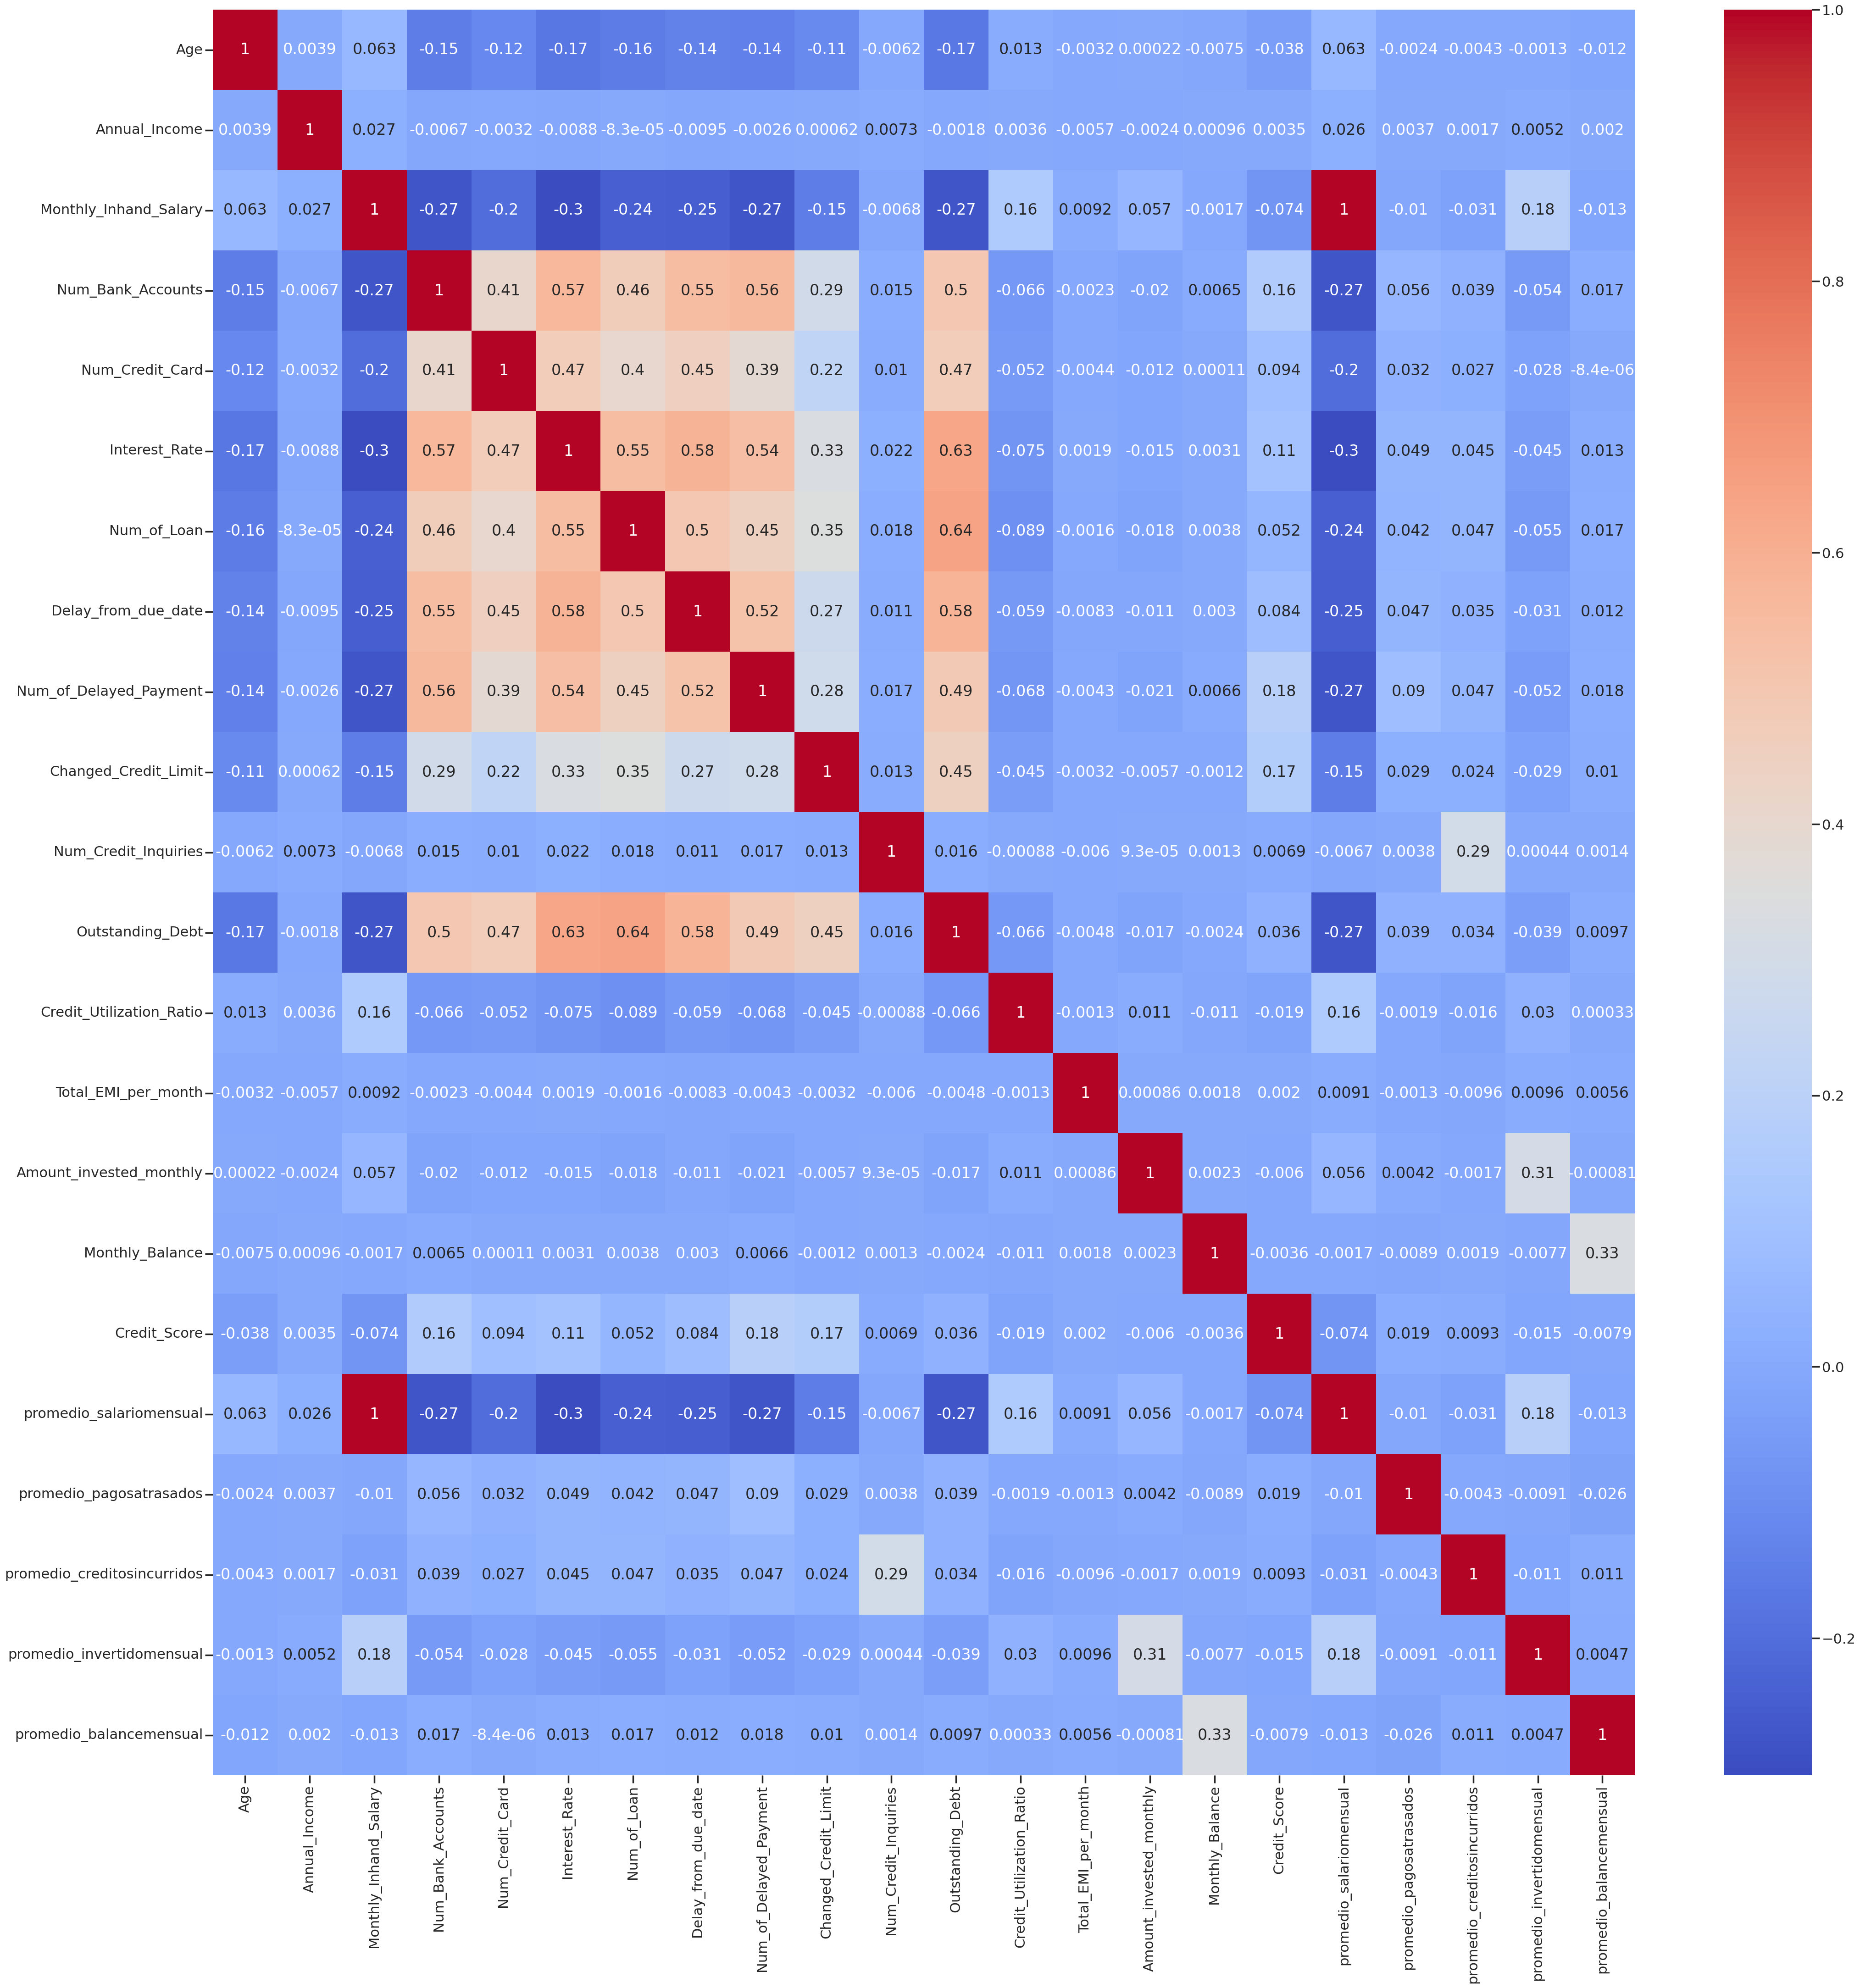

In [37]:
plt.figure(figsize=(50, 50)) #50 de ancho y 50 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
df1_corr= df1.select_dtypes(include=['float64', 'int64'])
corr_matriz = df1_corr.corr()
sns.heatmap(corr_matriz, annot= True, cmap= 'coolwarm') 

* Correlacion positiva entre numero de tarjetas de credito y numero de ctas bancarias 
* Correlacion positiva entre la tasa de interes y el numero de ctas bancarias, numero de tarjetas de credito, numero de prestamos, dias atraso pago y deuda pendiente
* relacion positiva entre numero de prestamos y deuda pendiente 
* relacion perfectamente positiva entre promedio de ingresos mensual e ingresos mensuales 
* tasa de interes presenta una correlacion ligeramente negativa con salario promedio mensual 
* salario promedio mensual, y deuda pendiente presenta una correlacion negativa 
* correlacion positiva fuerte entre tasa de interes y numero de prestamos con deuda pendiente
* salario promedio mensual y tasa de interes presenta una correlacion negativa 

# VISUALIZACIONES

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Outstanding_Debt'>

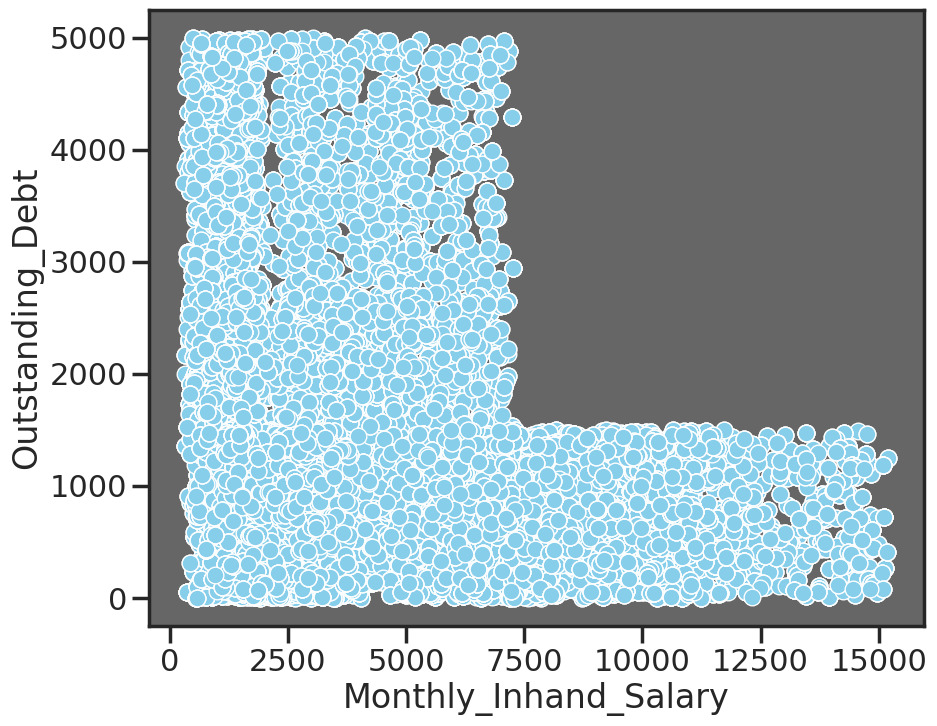

In [38]:
plt.figure(figsize=(10, 8)) #10 de ancho y 8 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.scatterplot(data=df1,x= 'Monthly_Inhand_Salary',y= 'Outstanding_Debt', color= 'skyblue')

A medida de que sube el ingreso mesual, la deuda pendiente tiende a bajar 

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Monthly_Balance'>

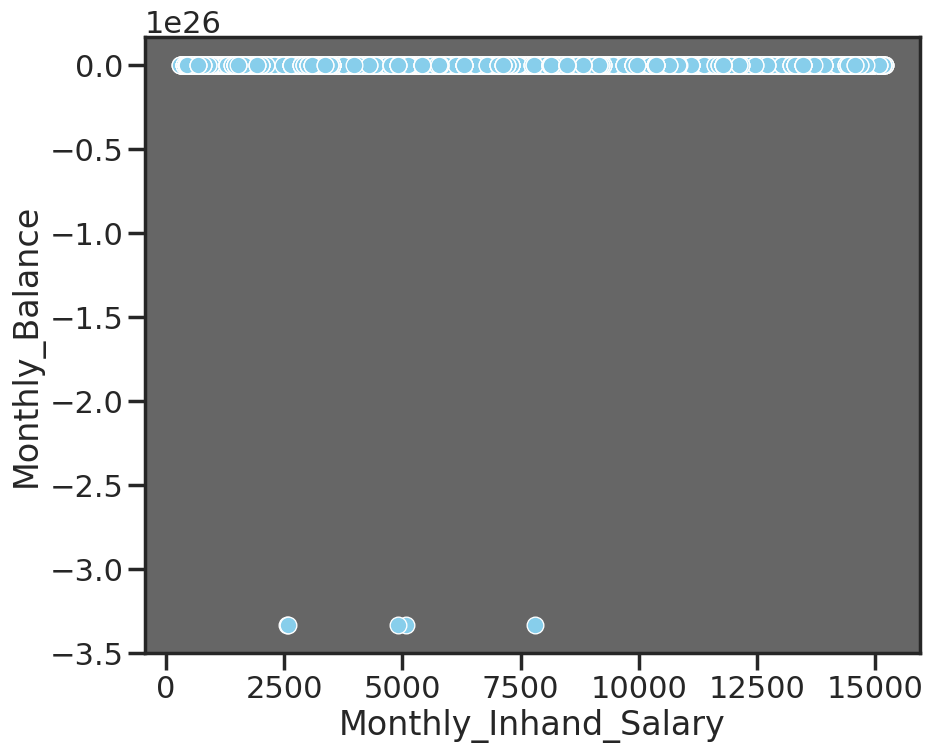

In [39]:
plt.figure(figsize=(10, 8)) #10 de ancho y 8 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.scatterplot(data=df1,x= 'Monthly_Inhand_Salary',y= 'Monthly_Balance', color= 'skyblue')

El balance del mes casi es positivo y alcanza a cubrir todas las deudas, ha excepcion de casos puntuales en donde a pesar de un alto salario mensual, su balance al finalizar el mes fue negativo

<Axes: xlabel='Annual_Income', ylabel='Outstanding_Debt'>

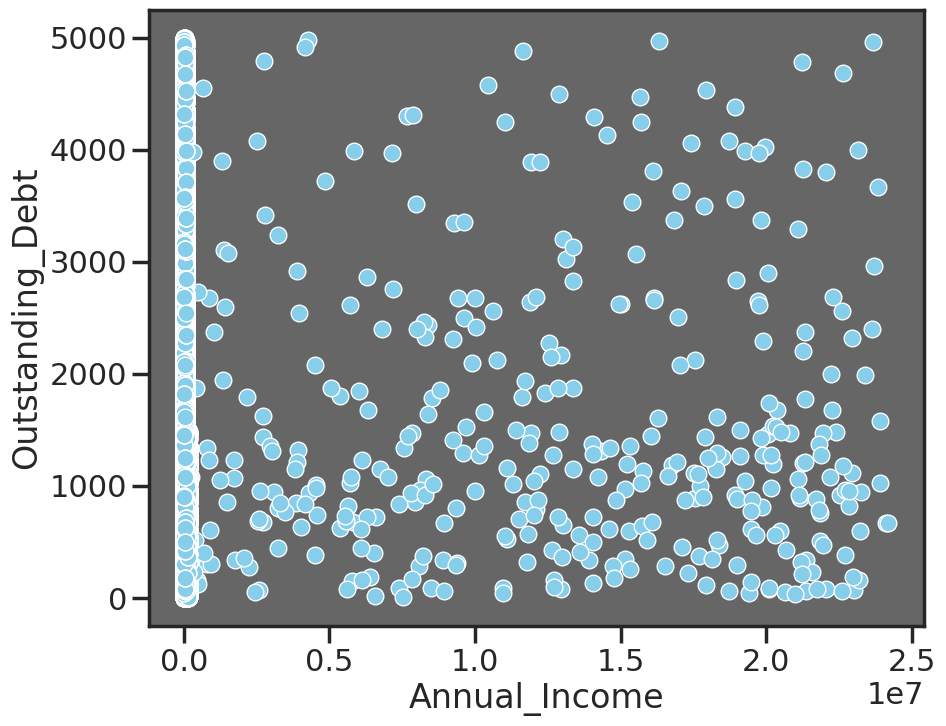

In [40]:
plt.figure(figsize=(10, 8)) #10 de ancho y 8 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.scatterplot(data=df1,x= 'Annual_Income',y= 'Outstanding_Debt', color= 'skyblue')

Los ingresos anuales y la deuda pendiente se comportan de manera independiente

<ipython-input-41-7de59150a5c4>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df1, y= 'Outstanding_Debt', x= 'Changed_Credit_Limit', palette= 'Pastel2')


<Axes: xlabel='Changed_Credit_Limit', ylabel='Outstanding_Debt'>

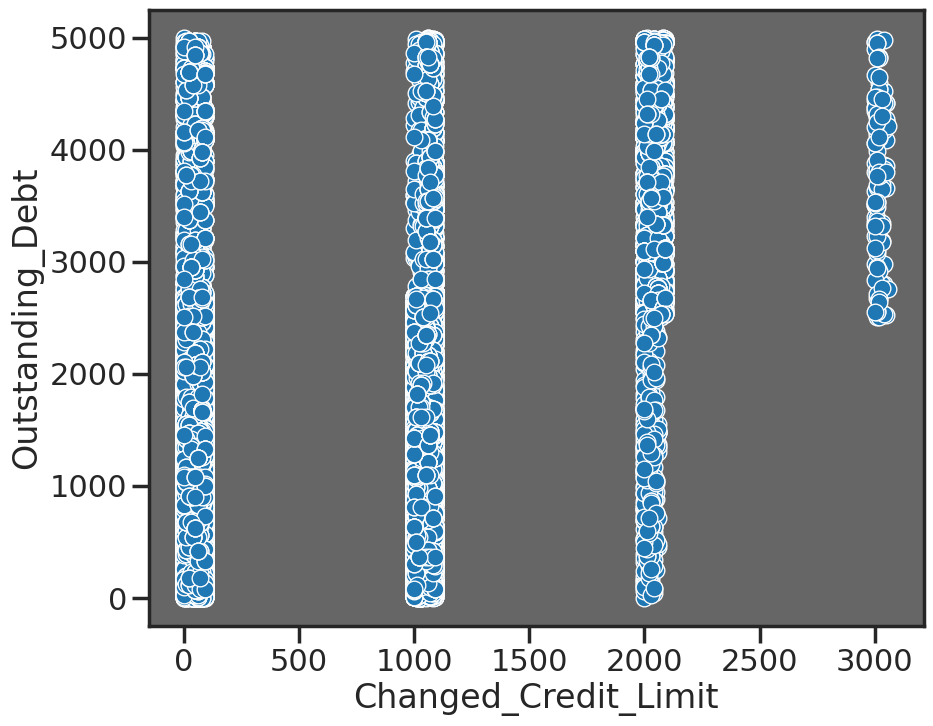

In [41]:
plt.figure(figsize=(10, 8)) #10 de ancho y 8 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.scatterplot(data=df1, y= 'Outstanding_Debt', x= 'Changed_Credit_Limit', palette= 'Pastel2')

Crece el limite de credito en la tarjeta, mi deuda pendiente va a crecer

# PREPARACION PARA MODELOS DE PRONOSTICO

In [42]:
df1

,ID,Customer_ID,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_dummies_Writer,Payment_Behaviour_dummies_High_spent_Large_value_payments,Payment_Behaviour_dummies_High_spent_Medium_value_payments,Payment_Behaviour_dummies_High_spent_Small_value_payments,Payment_Behaviour_dummies_Low_spent_Large_value_payments,Payment_Behaviour_dummies_Low_spent_Medium_value_payments,Payment_Behaviour_dummies_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
3,0x1605,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,0,0,0,0,1,0,1,0
4,0x1606,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,1,0,0,0,0,0,1,0
6,0x1608,CUS_0xd40,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4.0,...,0,0,0,0,0,0,1,0,1,0
9,0x160f,CUS_0x21b1,Rick Rothackerj,28.0,34847.84,3037.986667,2,4,6,1.0,...,0,1,0,0,0,0,0,0,1,0
11,0x1611,CUS_0x21b1,Rick Rothackerj,28.0,34847.84,3037.986667,2,4,6,1.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,0x25fda,CUS_0x8600,Sarah McBridec,28.0,20002.88,1929.906667,10,8,29,5.0,...,0,1,0,0,0,0,0,0,0,1
99985,0x25fdb,CUS_0x8600,Sarah McBridec,28.0,20002.88,1929.906667,10,8,29,5.0,...,0,0,0,0,0,0,1,0,0,1
99991,0x25fe1,CUS_0x8600,Sarah McBridec,29.0,20002.88,1929.906667,10,8,29,5.0,...,0,1,0,0,0,0,0,0,0,1
99993,0x25fe7,CUS_0x942c,Nicks,25.0,39628.99,3359.415833,4,6,7,2.0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
df1=df1.drop(['ID','Customer_ID','Name'],axis=1)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37584 entries, 3 to 99998
Columns: 5762 entries, Age to Payment_of_Min_Amount_Yes
dtypes: float64(17), int64(5), uint8(5740)
memory usage: 212.3 MB


# Se evaluara 3 tipos de modeslo 
* Regresion logistica 
* KNN
* Arbol 

# Regresion Logistica

In [45]:
from sklearn.metrics import accuracy_score
# Variables
X = df1.drop(columns=['Credit_Score'])
y = df1['Credit_Score']
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()

# Ajustamos ACP con varianza de .95
pca = PCA(n_components=.95)

# Make an instance of the model with default parameters
logreg = LogisticRegression()

# Put scaler, PCA and model in a pipeline
logreg_pipe = make_pipeline(scaler, pca, logreg)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
# Predicting the target variable for test dataset
y_pred = logreg_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
%%time
y_pred = logreg_pipe.predict(X_test)

CPU times: user 33.4 s, sys: 938 ms, total: 34.3 s
Wall time: 23 s


In [47]:
# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', score)

Accuracy Score: 0.7368028948488718


In [56]:
%%time
logreg_pipe.fit(X_train, y_train)

CPU times: user 13min 12s, sys: 43 s, total: 13min 55s
Wall time: 8min 46s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df1.drop(columns=['Credit_Score'])
y = df1['Credit_Score']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate Standard Scaler because scaling is required for k-NN
scaler = StandardScaler()

# Ajustamos ACP con varianza de .95
pca = PCA(n_components=.95)

# Instantiate the model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Put scaler, PCA and model in a pipeline
knn_pipe = make_pipeline(scaler, pca, knn)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
knn_pipe.fit(X_train, y_train)

# Predicting the target variable for test dataset
y_pred2 = knn_pipe.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', score)

Accuracy Score: 0.7368028948488718


In [58]:
%%time
knn_pipe.fit(X_train, y_train)

CPU times: user 10min 59s, sys: 32.8 s, total: 11min 32s
Wall time: 7min 9s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

# Arbol de Regresion

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df1.drop(columns=['Credit_Score'])
y = df1['Credit_Score']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate Standard Scaler because scaling is required for Random Forest
scaler = StandardScaler()

# Ajustamos ACP con varianza de .95
pca = PCA(n_components=.95)

# Instantiate the model with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Put scaler, PCA and model in a pipeline
rfc_pipe = make_pipeline(scaler, pca, rfc)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
rfc_pipe.fit(X_train, y_train)

# Predicting the target variable for test dataset
y_pred3 = rfc_pipe.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', score)

Accuracy Score: 0.7368028948488718


In [60]:
%%time
rfc_pipe.fit(X_train, y_train)

CPU times: user 14min 38s, sys: 29.4 s, total: 15min 8s
Wall time: 10min 53s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

# CONCLUSIONES 
# * EN EL MODELO DE REGRESION LOGISTICA EL PORCENTAJE DE EFECTIVIDAD DE PREDICCION ES DEL 73,68% 
# * EN EL MODELO DE KNN EL PORCENTAJE DE EFECTIVIDAD DE PREDICCION ES DEL 73,68%
# * EN EL MODELO DE RANDOM FOREST EL PORCENTAJE ES DE 73,68%

## SE ELEGIRIA LA OPCION DE LA REGRESION LOGISTICA COMO MODELO DE PREDICCION DE LA VARIABLE OBJETIVO "CREDIT SCORE"


